**Connecting the Colab notebook to Google Drive** 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Checking CUDA release version and installing cuDNN**

In [3]:
#!/usr/local/cuda/bin/nvcc --version

In [4]:
# Unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/SOFT/cuDNN/cudnn-10.1-linux-x64-v7.6.4.38.solitairetheme8 -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.4
cuda/lib64/libcudnn_static.a


**Cloning and compiling Darknet**

In [5]:
cd /content/gdrive/My Drive/SOFT

/content/gdrive/My Drive/SOFT


In [6]:
#!git clone https://github.com/AlexeyAB/darknet.git

In [7]:
# cd darknet
#!make

In [8]:
!git clone https://github.com/kriyeng/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.16 MiB | 8.55 MiB/s, done.
Resolving deltas: 100% (6736/6736), done.
Checking out files: 100% (1956/1956), done.


In [9]:
cd /content/gdrive/My Drive/SOFT/darknet

/content/gdrive/My Drive/SOFT/darknet


In [10]:
! ls
! git checkout feature/google-colab
! make

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  CMakeSettings.json      include		     src
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet.py	      LICENSE		     video_yolov3.sh
build.sh      darknet_video.py	      Makefile
cfg	      data		      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md
M	build.ps1
M	build.sh
M	image_yolov2.sh
M	image_yolov3.sh
M	json_mjpeg_streams.sh
M	net_cam_v3.sh
M	scripts/gen_tactic.sh
M	video_v2.sh
M	video_yolov3.sh
Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/

In [11]:
!chmod 755 ./darknet

**Cloning my repo with dataset**

In [12]:
cd /content/gdrive/My Drive/SOFT

/content/gdrive/My Drive/SOFT


In [13]:
!git clone https://github.com/kristinadj/FlagRecognition.git

Cloning into 'FlagRecognition'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 10399 (delta 14), reused 295 (delta 8), pack-reused 10091
Receiving objects: 100% (10399/10399), 251.70 MiB | 19.85 MiB/s, done.
Resolving deltas: 100% (2192/2192), done.
Checking out files: 100% (4937/4937), done.


In [14]:
cd /content/gdrive/My Drive/SOFT/darknet

/content/gdrive/My Drive/SOFT/darknet


**Weights downloading**

In [15]:
#!wget https://pjreddie.com/media/files/yolov3.weights -O /content/gdrive/My\ Drive/SOFT/weights/yolov3.weights

In [16]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74 -O /content/gdrive/My\ Drive/SOFT/FlagRecognition/weights/darknet53.conv.74

In [17]:
#!wget https://pjreddie.com/media/files/yolov3-tiny.weights -O /content/gdrive/My\ Drive/SOFT/weights/yolov3-tiny.weights

**Transferring label files in folders with images**

In [18]:
import os

def rename_files():
    for f in os.listdir('/content/gdrive/My Drive/SOFT/FlagRecognition/dataset/labels'):
        old_file = os.path.join('/content/gdrive/My Drive/SOFT/FlagRecognition/dataset/labels', f)
        new_file = os.path.join('/content/gdrive/My Drive/SOFT/FlagRecognition/dataset/images', f)

        os.rename(old_file, new_file)

In [19]:
rename_files()

**Training**

In [20]:
# !./darknet detector calc_anchors '/content/gdrive/My Drive/SOFT/FlagRecognition/darknet.data' -num_of_clusters 3 -width 416 -height 416 -show

In [21]:
! ./darknet detector train ../FlagRecognition/darknet.data ../FlagRecognition/yolov3-tiny.cfg ../weights/darknet53.conv.74 -dont_show -map > ../weights/train.log

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

**Testing**

In [27]:
!./darknet detector map ../FlagRecognition/darknet-test.data ../FlagRecognition/yolov3-tiny-test.cfg ../weights/yolov3-tiny_final.weights

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [24]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

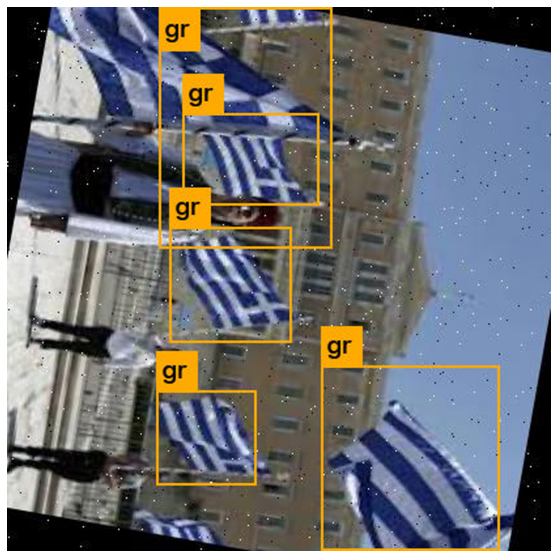

In [50]:
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg' (for testing darkent init)
!./darknet detect ../FlagRecognition/yolov3-tiny.cfg ../weights/yolov3-tiny_final.weights ../FlagRecognition/dataset/images/gr_00013_jpg_8142ab492ddc2ba8de2ed247eaee141b.jpg -dont-show

#Show the result using the helper imgShow()
imShow('predictions.jpg')

Loss plot


In [29]:
import sys
import matplotlib.pyplot as plt

def plot_loss(trainlog):
  lines = []
  for line in open(trainlog):
    if "avg" in line:
        lines.append(line)

  iterations = []
  avg_loss = []

  print('Retrieving data and plotting training loss graph...')
  for i in range(len(lines)):
    lineParts = lines[i].split(',')
    iterations.append(int(lineParts[0].split(':')[0]))
    avg_loss.append(float(lineParts[1].split()[0]))

  fig = plt.figure()
  for i in range(0, len(lines)):
    plt.plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-')

  plt.xlabel('Batch Number')
  plt.ylabel('Avg Loss')
  fig.savefig('training_loss_plot.png', dpi=1000)

  print('Done! Plot saved as training_loss_plot.png')

In [ ]:
cd /content/gdrive/My Drive/SOFT/weights

Retrieving data and plotting training loss graph...
Done! Plot saved as training_loss_plot.png


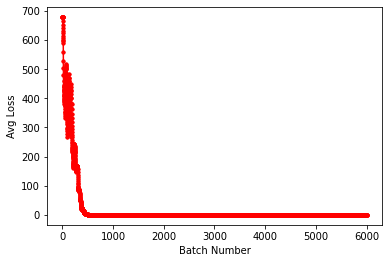

In [31]:
plot_loss('/content/gdrive/My Drive/SOFT/weights/train.log')